In [164]:
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import linear_model
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6  #To make it large


In [165]:
df = pd.read_excel('/content/prevvvvv.xlsx'  )
df

,annees,chiff_aff
0,1,61500
1,2,75000
2,3,87900
3,4,105300
4,5,136800
5,6,160500


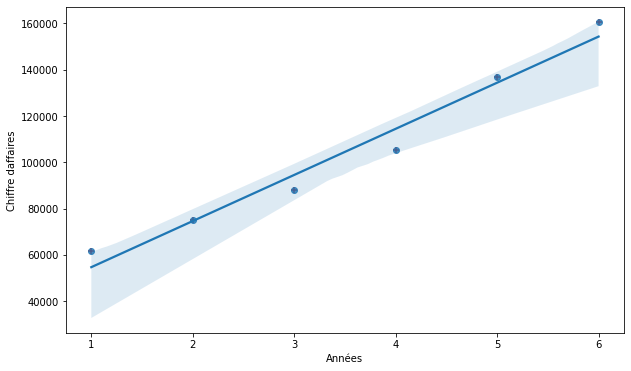

In [166]:
plt.scatter(x='annees' , y='chiff_aff' , data=df , marker='+' , color='red')
sns.regplot(x='annees' , y='chiff_aff' , data=df)
plt.xlabel('Années')
plt.ylabel('Chiffre daffaires')
plt.show()

In [167]:
ann = df.drop('chiff_aff' , axis=1)
ca = df.chiff_aff

In [168]:
reg = linear_model.LinearRegression()

In [169]:
reg.fit(ann , ca)

LinearRegression()

In [170]:
reg.intercept_ , reg.coef_

(34720.0, array([19937.14285714]))

In [171]:
reg.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([174280.])

In [172]:
df2 = pd.read_excel('/content/prevvvvv_mois.xlsx' , names=['mois' , 'ann4' , 'ann5' , 'ann6'])
df2.drop( (12), axis=0 , inplace=True)
df2

,mois,ann4,ann5,ann6
0,Janvier,12500,18000,19825
1,Février,13000,16700,23980
2,Mars,12500,15100,16015
3,Avril,10800,13450,16010
4,Mai,6980,8250,11610
5,Juin,4920,5860,9350
6,Juillet,3700,4850,4870
7,Août,2800,3890,3375
8,Septembre,10700,12600,10250
9,Octobre,11400,14900,13960


In [180]:
moy_aan4 = df2.ann4.mean()
moy_aan5 = df2.ann5.mean()
moy_aan6 = df2.ann6.mean()

print(moy_aan4 , moy_aan5 , moy_aan6)

8775.0 11400.0 13375.0


In [174]:
df2['moy_mois'] = df2.loc[0:, 'ann4':].mean(axis=1)
df2

,mois,ann4,ann5,ann6,moy_mois
0,Janvier,12500,18000,19825,16775.000000
1,Février,13000,16700,23980,17893.333333
2,Mars,12500,15100,16015,14538.333333
3,Avril,10800,13450,16010,13420.000000
4,Mai,6980,8250,11610,8946.666667
5,Juin,4920,5860,9350,6710.000000
6,Juillet,3700,4850,4870,4473.333333
7,Août,2800,3890,3375,3355.000000
8,Septembre,10700,12600,10250,11183.333333
9,Octobre,11400,14900,13960,13420.000000


In [175]:
moy_moy = (df2.moy_mois.sum())/len(df2)
moy_moy

11183.333333333334

In [176]:
df2['coeff'] = df2.loc[0: , 'moy_mois' : ].div(moy_moy)
df2

,mois,ann4,ann5,ann6,moy_mois,coeff
0,Janvier,12500,18000,19825,16775.000000,1.5
1,Février,13000,16700,23980,17893.333333,1.6
2,Mars,12500,15100,16015,14538.333333,1.3
3,Avril,10800,13450,16010,13420.000000,1.2
4,Mai,6980,8250,11610,8946.666667,0.8
5,Juin,4920,5860,9350,6710.000000,0.6
6,Juillet,3700,4850,4870,4473.333333,0.4
7,Août,2800,3890,3375,3355.000000,0.3
8,Septembre,10700,12600,10250,11183.333333,1.0
9,Octobre,11400,14900,13960,13420.000000,1.2


In [177]:
ca_prev_mois = (174280.)/(12)
df2['ann7'] = df2.loc[0: , 'coeff' : ].multiply(ca_prev_mois)
df2

,mois,ann4,ann5,ann6,moy_mois,coeff,ann7
0,Janvier,12500,18000,19825,16775.000000,1.5,21785.000000
1,Février,13000,16700,23980,17893.333333,1.6,23237.333333
2,Mars,12500,15100,16015,14538.333333,1.3,18880.333333
3,Avril,10800,13450,16010,13420.000000,1.2,17428.000000
4,Mai,6980,8250,11610,8946.666667,0.8,11618.666667
5,Juin,4920,5860,9350,6710.000000,0.6,8714.000000
6,Juillet,3700,4850,4870,4473.333333,0.4,5809.333333
7,Août,2800,3890,3375,3355.000000,0.3,4357.000000
8,Septembre,10700,12600,10250,11183.333333,1.0,14523.333333
9,Octobre,11400,14900,13960,13420.000000,1.2,17428.000000


In [182]:
df2.ann7.sum() , df2.coeff.sum()

(174280.0, 11.999999999999998)

In [178]:
with pd.ExcelWriter('output.xlsx') as writer :
  df2.to_excel(writer, sheet_name='complety')